# The HFM library - A fast marching solver with adaptive stencils

## Part : Algorithmic enhancements to the fast marching method
## Chapter : Refined input and output

This notebook illustrates the implementation of monotone schemes on non-rectangular domains.

## 0. Importing the required libraries

In [1]:
import sys; sys.path.append("../..") # Allow imports from parent directory
#from Miscellaneous import TocTools; print(TocTools.displayTOC('RefinedIO','FMM'))

In [2]:
from NumericalSchemes import HFMUtils
from NumericalSchemes import Metrics

In [3]:
# We will also need some standard python libraries.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def reload_submodules():
    HFMUtils.reload_submodules()
    Metrics.reload_submodules()

In [5]:
help(HFMUtils.RunRefined)

Help on function RunRefined in module NumericalSchemes.HFMUtils.run_refined:

RunRefined(hfmIn, tupleIn=(), tupleOut=None)
    Calls the HFM library, with pre-processed and post-processing of data.
    
    tupleIn and tupleOut are intended to make the inputs and outputs 
    visible to reverse automatic differentiation
    - tupleIn : arguments specified as ((key_1,value_1), ..., (key_n,value_m))
            take precedence over similar keys hfmIn
    - tupleOut : (key_1, ..., key_n) corresponding to results 
            (value_1,...,value_n) to be return in a tuple



## 1. Testing

In [12]:
hfmInput = {} 
hfmInput['model'] = 'Riemann2' # Adequate model for two dimensional Riemannian metrics.
hfmInput['arrayOrdering'] = 'YXZ_RowMajor' # Compatibility with numpy.meshgrid and pyplot

# Create the parameter space
n=100
hfmInput.update(HFMUtils.Rect(sides=[[-2,2],[0,1]],dimx=4*n))
mu,sig = HFMUtils.GetGrid(hfmInput)

hfmInput['metric'] = np.stack( (1./sig**2, 0.*sig, 2./sig**2), 2)                          
# In view of the specific form of the metric, the simpler model Isotropic2 would also have fitted.

hfmInput['seeds'] = np.array([ [0,0.3] ]) # A single seed
hfmInput['tips'] = np.array([ (x,y) for y in HFMUtils.CenteredLinspace(0,1,3) 
                             for x in HFMUtils.CenteredLinspace(-2,2,4)]) # 12 tips

hfmInput['exportValues'] = 1
hfmInput['order'] = 2

In [7]:
riemann = Metrics.Riemann.from_diagonal(1./sig**2,2./sig**2)
hfmInput['metric'] = riemann

In [8]:
riemann.model_HFM()

'Riemann2'

In [9]:
hfmInput['model']='AsymmetricQuadratic2'
hfmInput['metric'] = Metrics.AsymQuad.from_cast(riemann)

In [13]:
hfmOutput = HFMUtils.Run(hfmInput)

Field verbosity defaults to 1
Field spreadSeeds defaults to -1
Field showProgress defaults to 0
Field factoringMethod defaults to None
Fast marching solver completed in 0.021169 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 8.45
Field exportActiveNeighs defaults to 0
Field exportGeodesicFlow defaults to 0



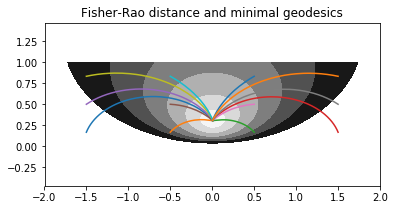

In [11]:
fig = plt.figure(figsize=[6,3]); plt.title('Fisher-Rao distance and minimal geodesics'); plt.axis('equal'); 
plt.contourf(mu,sig,hfmOutput['values'],cmap='Greys',levels=np.linspace(0,3,7));  # Display the value function. 
for geo in hfmOutput['geodesics']:  plt.plot(*geo)
#savefig(fig,"FisherRao_Gaussian1D.png")

In [12]:
hfmOutput.keys()

dict_keys(['FMCPUTime', 'GeodesicCPUTime', 'MaxStencilWidth', 'StencilCPUTime', 'defaulted', 'geodesicLengths', 'geodesicPoints', 'nAccepted', 'unusedFromCompute', 'values', 'visitedUnset', 'log', 'retcode'])

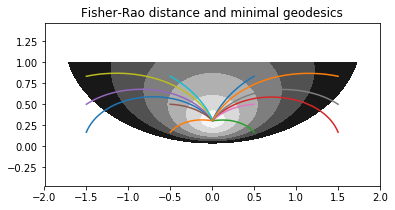

In [14]:
fig = plt.figure(figsize=[6,3]); plt.title('Fisher-Rao distance and minimal geodesics'); plt.axis('equal'); 
plt.contourf(mu,sig,hfmOutput['values'],cmap='Greys',levels=np.linspace(0,3,7));  # Display the value function. 
for geo in HFMUtils.GetGeodesics(hfmOutput):  plt.plot(geo[:,0],geo[:,1])
#savefig(fig,"FisherRao_Gaussian1D.png")

In [16]:
def f():
    """help of f"""
    pass
def g():
    """help of g"""+f.__doc__
    pass

In [18]:
help(g)

Help on function g in module __main__:

g()



In [15]:
f.__doc__

'help of f'

In [13]:
attr(f)

NameError: name 'attr' is not defined